In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Path to your saved embeddings
npz_path = Path("../data/output/map_out/maps_embeddings.npz")

data = np.load(npz_path, allow_pickle=True)
E = data["E"]          # (num_maps, embedding_dim)
ids = data["ids"]      # (num_maps,)
E.shape, len(ids)


((300, 221), 300)

In [9]:
df_stats = pd.DataFrame({
    "mean": E.mean(axis=0),
    "std": E.std(axis=0),
    "min": E.min(axis=0),
    "max": E.max(axis=0)
})
display(df_stats.describe())

print(f"Global mean of all features: {E.mean():.4f}")
print(f"Global std of all features:  {E.std():.4f}")


,mean,std,min,max
count,221.000000,221.000000,221.000000,221.000000
mean,0.297611,0.038419,0.204759,0.429821
std,0.530280,0.073995,0.490864,0.651290
min,-0.970999,0.000000,-1.000000,-0.192313
25%,0.007610,0.002225,0.000267,0.019746
50%,0.029536,0.008224,0.013199,0.101259
75%,0.499003,0.036384,0.190207,0.802288
max,2.950374,0.531859,2.307593,4.484384


Global mean of all features: 0.2976
Global std of all features:  0.5356


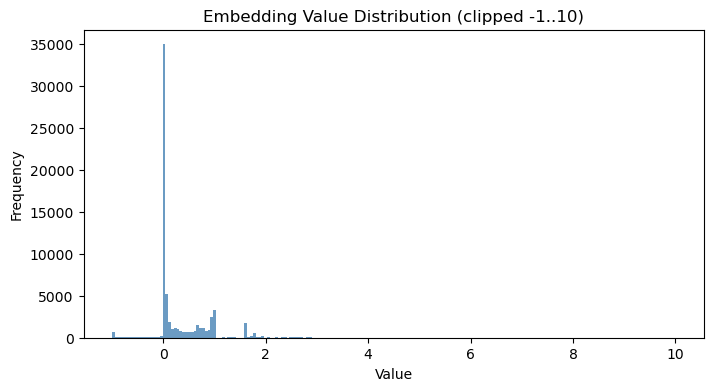

In [10]:
plt.figure(figsize=(8,4))
plt.hist(E.flatten(), bins=200, range=(-1, 10), color="steelblue", alpha=0.8)
plt.title("Embedding Value Distribution (clipped -1..10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Count maps (rows) that are completely zero
num_zero_rows = np.sum(~E.any(axis=1))
perc_zero_rows = 100 * num_zero_rows / len(E)

# Count individual zero elements
num_zero_elements = np.sum(E == 0)
perc_zero_elements = 100 * num_zero_elements / E.size

print(f"Maps with all-zero embeddings: {num_zero_rows} / {len(E)} ({perc_zero_rows:.2f}%)")
print(f"Individual zero values: {num_zero_elements:,} ({perc_zero_elements:.2f}%)")


Maps with all-zero embeddings: 0 / 300 (0.00%)
Individual zero values: 7,257 (10.95%)


In [12]:
import numpy as np
import pandas as pd
import json

# --- Load embeddings and feature names ---
data = np.load("../data/output/map_out/maps_embeddings.npz", allow_pickle=True)
E = data["E"]

# try to load feature names if available
try:
    with open("../data/output/map_out/feature_names.json", "r") as f:
        feature_names = json.load(f)
except Exception:
    feature_names = [f"f{i:03d}" for i in range(E.shape[1])]

# --- Compute statistics for each feature ---
df_stats = pd.DataFrame({
    "feature": feature_names,
    "min":  E.min(axis=0),
    "max":  E.max(axis=0),
    "mean": E.mean(axis=0),
    "median": np.median(E, axis=0),
    "std":  E.std(axis=0),
    "mode": [pd.Series(E[:, i]).mode(dropna=True).iloc[0] 
             if not pd.Series(E[:, i]).mode(dropna=True).empty else np.nan
             for i in range(E.shape[1])]
})

# --- Sort by max absolute value to highlight large features ---
df_stats["abs_max"] = df_stats["max"].abs()
df_stats = df_stats.sort_values("abs_max", ascending=False)

# --- Display nicely ---
pd.set_option("display.max_rows", 50)
pd.set_option("display.precision", 4)
display(df_stats[["feature", "min", "max", "mean", "median", "std", "mode"]].head(30))


,feature,min,max,mean,median,std,mode
95,vertex_count__max,2.3076,4.4844,2.9504,2.9098,3.1655e-01,2.8332
114,reflex_count__max,2.0194,3.8808,2.5274,2.4849,2.5938e-01,2.3979
99,elongation__max,0.9092,2.9890,1.3798,1.3576,2.2572e-01,0.9092
188,vertex_count__q75,1.6094,2.4849,1.9272,1.9459,1.6078e-01,1.9459
207,reflex_count__q75,1.6094,2.1972,1.7874,1.7918,1.0521e-01,1.7918
157,vertex_count__q50,1.6094,2.1972,1.6555,1.6094,1.0418e-01,1.6094
2,vertex_count__mean,1.6485,2.1571,1.8064,1.7913,8.2487e-02,1.6485
21,reflex_count__mean,1.6326,1.9568,1.7262,1.7154,5.1988e-02,1.6326
176,reflex_count__q50,1.6094,1.9459,1.6314,1.6094,6.2003e-02,1.6094
126,vertex_count__q25,1.6094,1.7918,1.6107,1.6094,1.4837e-02,1.6094


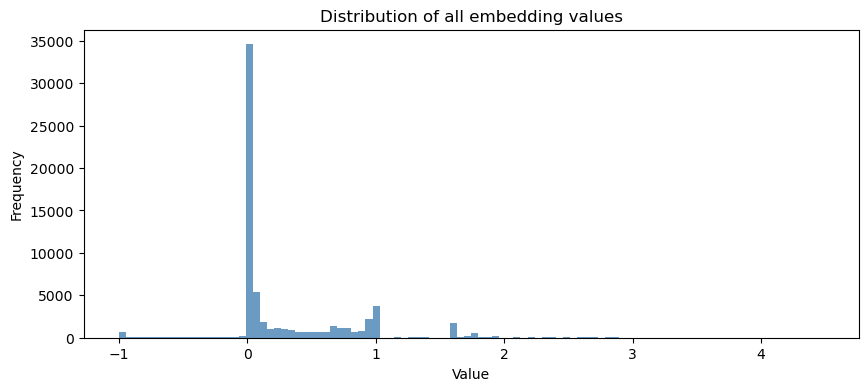

In [13]:
plt.figure(figsize=(10,4))
plt.hist(E.flatten(), bins=100, color="steelblue", alpha=0.8)
plt.title("Distribution of all embedding values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
nan_cols = np.isnan(E).any(axis=0)
inf_cols = np.isinf(E).any(axis=0)
const_cols = (E.std(axis=0) < 1e-6)

print(f"NaN dims: {nan_cols.sum()}, Inf dims: {inf_cols.sum()}, Constant dims: {const_cols.sum()}")


NaN dims: 0, Inf dims: 0, Constant dims: 18


Mean cosine similarity: 0.982, Std: 0.010


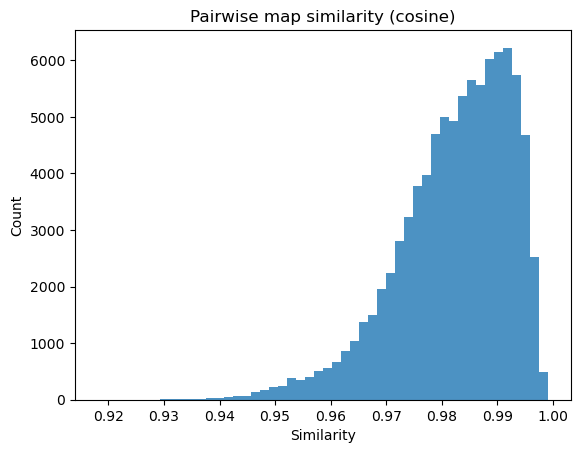

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

S = cosine_similarity(E)
np.fill_diagonal(S, np.nan)
print(f"Mean cosine similarity: {np.nanmean(S):.3f}, Std: {np.nanstd(S):.3f}")
plt.hist(S[~np.isnan(S)], bins=50, alpha=0.8)
plt.title("Pairwise map similarity (cosine)")
plt.xlabel("Similarity")
plt.ylabel("Count")
plt.show()


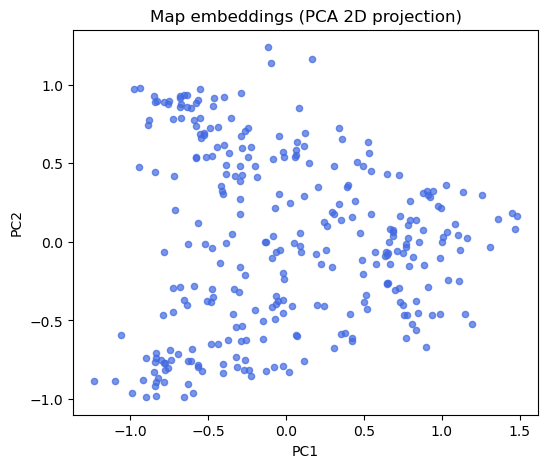

Explained variance ratio: 0.46361417


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
E2d = pca.fit_transform(E)
plt.figure(figsize=(6,5))
plt.scatter(E2d[:,0], E2d[:,1], s=20, c='royalblue', alpha=0.7)
plt.title("Map embeddings (PCA 2D projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_.sum())


In [17]:
import numpy as np, pandas as pd, json
from pathlib import Path

ROOT = Path("../data/output/map_out")
npz = np.load(ROOT / "maps_embeddings.npz", allow_pickle=True)
E   = npz["E"]            # shape: (num_maps, 256)
ids = npz["ids"]

# Load feature names
try:
    feat_names = json.load(open(ROOT / "feature_names.json"))
except Exception:
    feat_names = [f"f{i:03d}" for i in range(E.shape[1])]

assert E.shape[1] == len(feat_names), f"Dim mismatch: E has {E.shape[1]} cols, names={len(feat_names)}"

# Per-dimension stats across maps
df_values = pd.DataFrame(E, columns=feat_names)
agg = pd.DataFrame({
    "feature": df_values.columns,
    "min":     df_values.min(axis=0).values,
    "max":     df_values.max(axis=0).values,
    "mean":    df_values.mean(axis=0).values,
    "std":     df_values.std(axis=0).values,
})

# Split "base__stat" if available
def split_feature(name):
    if "__" in name:
        b, s = name.split("__", 1)
    else:
        b, s = name, "raw"
    return b, s

base_stat = [split_feature(f) for f in agg["feature"]]
agg["base"] = [b for b, _ in base_stat]
agg["stat"] = [s for _, s in base_stat]

# Simple normalization flags (tweak thresholds as you like)
MEAN_ABS_THR = 1.0
STD_THR      = 1.0
RANGE_THR    = 6.0     # e.g., expect most normalized features to stay within ~[-3, +3]

agg["abs_mean"] = agg["mean"].abs()
agg["range"]    = agg["max"] - agg["min"]

agg["flag_abs_mean"] = agg["abs_mean"] > MEAN_ABS_THR
agg["flag_std"]      = agg["std"] > STD_THR
agg["flag_range"]    = agg["range"] > RANGE_THR
agg["flags_total"]   = agg[["flag_abs_mean","flag_std","flag_range"]].sum(axis=1)

# Sort by “most suspicious”
agg_sorted = agg.sort_values(["flags_total","std","abs_mean","range"], ascending=[False, False, False, False])

# Display the main 256× table
cols = ["feature","base","stat","min","max","mean","std","abs_mean","range","flag_abs_mean","flag_std","flag_range"]
display(agg_sorted[cols].reset_index(drop=True))

# Also: quick group view to see which base features misbehave across stats
group = (
    agg.groupby(["base","stat"])
       .agg(min_min=("min","min"),
            max_max=("max","max"),
            mean_mean=("mean","mean"),
            mean_std=("mean","std"),
            std_mean=("std","mean"),
            std_std=("std","std"))
       .reset_index()
       .sort_values(["std_mean","mean_std"], ascending=False)
)
display(group.head(40))

,feature,base,stat,min,max,mean,std,abs_mean,range,flag_abs_mean,flag_std,flag_range
0,vertex_count__max,vertex_count,max,2.3076,4.4844,2.9504,0.3171,2.9504,2.1768,True,False,False
1,reflex_count__max,reflex_count,max,2.0194,3.8808,2.5274,0.2598,2.5274,1.8614,True,False,False
2,elongation__max,elongation,max,0.9092,2.9890,1.3798,0.2261,1.3798,2.0797,True,False,False
3,vertex_count__q75,vertex_count,q75,1.6094,2.4849,1.9272,0.1610,1.9272,0.8755,True,False,False
4,reflex_count__q75,reflex_count,q75,1.6094,2.1972,1.7874,0.1054,1.7874,0.5878,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
216,neighbor_count_intersects__q25,neighbor_count_intersects,q25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
217,mean_neighbor_distance_intersects__q25,mean_neighbor_distance_intersects,q25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
218,hole_count__q25,hole_count,q25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
219,hole_count__q50,hole_count,q50,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False


,base,stat,min_min,max_max,mean_mean,mean_std,std_mean,std_std
179,orient_sin,q50,-9.9632e-01,0.9994,0.0447,NaN,0.5327,NaN
172,orient_cos,q50,-9.9843e-01,0.9943,0.0398,NaN,0.4420,NaN
178,orient_sin,q25,-9.9930e-01,0.9957,-0.6705,NaN,0.3255,NaN
214,vertex_count,max,2.3076e+00,4.4844,2.9504,NaN,0.3171,NaN
171,orient_cos,q25,-9.9991e-01,0.4291,-0.5762,NaN,0.2954,NaN
173,orient_cos,q75,1.7698e-02,0.9996,0.5770,NaN,0.2939,NaN
180,orient_sin,q75,1.3132e-02,0.9998,0.6961,NaN,0.2770,NaN
200,reflex_count,max,2.0194e+00,3.8808,2.5274,NaN,0.2598,NaN
77,elongation,max,9.0924e-01,2.9890,1.3798,NaN,0.2261,NaN
174,orient_cos,std,4.9669e-02,0.9961,0.6185,NaN,0.2130,NaN


In [18]:
import pandas as pd

cols = [
    "feature","base","stat","min","max","mean","std",
    "abs_mean","range","flag_abs_mean","flag_std","flag_range","flags_total"
]

out_path = "map_embedding_diagnostics.xlsx"

# Ensure agg_sorted and group exist and have data
if 'agg_sorted' not in locals() or 'group' not in locals():
    raise ValueError("Please run the previous cell that generates `agg_sorted` and `group` first!")

with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
    agg_sorted[cols].to_excel(writer, sheet_name="per_dimension", index=False)
    group.to_excel(writer, sheet_name="grouped", index=False)

    wb = writer.book
    for sheet in ["per_dimension", "grouped"]:
        ws = writer.sheets[sheet]
        ws.freeze_panes(1, 0)
        # ws.dim_rowmax / ws.dim_colmax can be None on some xlsxwriter versions — use shape instead
        nrows, ncols = (agg_sorted.shape if sheet == "per_dimension" else group.shape)
        ws.autofilter(0, 0, nrows, ncols - 1)
        for i, width in enumerate([26,16,10] + [12]*(ncols-3)):
            ws.set_column(i, i, width)

print(f"✅ Excel file saved: {out_path}")

✅ Excel file saved: map_embedding_diagnostics.xlsx
